# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [35]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [48]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/EricBoumel/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [84]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,THREE RIVERS MEDICAL CENTER,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,SELLS INDIAN HEALTH SERVICE HOSPITAL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,PHS INDIAN HOSPITAL AT PINE RIDGE,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FLORIDA STATE HOSPITAL UNIT 31 MED,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,GREENE COUNTY HOSPITAL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,FAIRVIEW DEVELOPMENTAL CENTER,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,WAGONER COMMUNITY HOSPITAL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,ST LUKE'S HOSPITAL AT THE VINTAGE,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,SOUTH TEXAS SURGICAL HOSPITAL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,GEORGE L MEE MEMORIAL HOSPITAL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


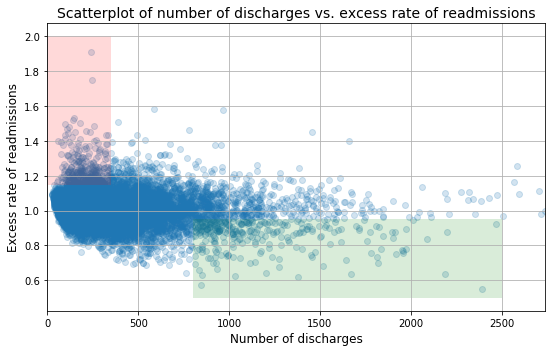

In [83]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [130]:
# Your turn
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [85]:
hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [86]:
hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,11578.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,362.909397,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,309.176945,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,0.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,157.000000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,280.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,472.750000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,6793.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [87]:
hospital_read_df.dtypes

Hospital Name                         object
Provider Number                        int64
State                                 object
Measure Name                          object
Number of Discharges                 float64
Footnote                             float64
Excess Readmission Ratio             float64
Predicted Readmission Rate           float64
Expected Readmission Rate            float64
Number of Readmissions               float64
Start Date                    datetime64[ns]
End Date                      datetime64[ns]
dtype: object

In [88]:
hospital_read_df['Hospital Name']=hospital_read_df.astype(str)


In [89]:
hospital_read_df['State']=hospital_read_df['State'].astype(str)


In [90]:
hospital_read_df['Measure Name']=hospital_read_df['Measure Name'].astype(str)


In [91]:
#df = df.replace('', np.nan)
hospital_read_df['Number of Discharges'] = hospital_read_df['Number of Discharges'].replace('Not Available', np.nan)
#df['x'] = pd.to_numeric(df['x'], errors='coerce')
hospital_read_df['Number of Discharges'] = pd.to_numeric(hospital_read_df['Number of Discharges'], errors='coerce')
#hospital_read_df['Number of Discharges']=hospital_read_df['Number of Discharges'].astype(int). I hade to use coerce


In [92]:
#df['my_dates'] = pd.to_datetime(df['my_dates'])
hospital_read_df['Start Date']=pd.to_datetime(hospital_read_df['Start Date'])
hospital_read_df['End Date']=pd.to_datetime(hospital_read_df['End Date'])

In [94]:
#Question1
clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


In [113]:
# Calculation of Statistics
small_hospital = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']<100) & (clean_hospital_read_df['Number of Discharges']>0)]
small_hospital_array = np.array(small_hospital['Excess Readmission Ratio'])
small_hospital_array

array([1.0914, 1.0961, 1.0934, ..., 1.0248, 0.9878, 1.0337])

In [114]:
big_hospital = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']>1000)]
big_hospital_array = np.array(big_hospital['Excess Readmission Ratio'])
big_hospital_array

array([0.9192, 1.1405, 1.076 , 0.993 , 1.0765, 0.989 , 0.8992, 0.8781,
       1.1941, 0.9076, 0.867 , 0.8085, 0.9934, 0.9574, 1.1187, 0.8636,
       0.8683, 1.0975, 0.7931, 1.0061, 0.9432, 0.8426, 1.0002, 0.7325,
       1.0447, 0.9769, 1.2087, 0.9671, 0.8484, 1.0353, 1.0521, 0.8674,
       1.044 , 0.8812, 0.8963, 1.0571, 1.0007, 0.6262, 1.0327, 0.9626,
       0.8833, 1.1874, 1.006 , 1.1034, 1.0967, 0.8736, 1.0366, 1.0522,
       0.8236, 1.0008, 1.005 , 1.0639, 0.9383, 0.9773, 1.073 , 0.9854,
       1.0755, 0.8864, 0.9281, 1.2094, 0.8397, 0.8349, 1.1255, 0.7265,
       0.9286, 0.9221, 0.8753, 0.9252, 0.9884, 0.8127, 1.1145, 0.9769,
       0.8767, 0.871 , 0.9225, 0.9678, 0.8675, 0.9731, 0.9916, 0.9543,
       1.0882, 0.9666, 1.1172, 0.9831, 0.9333, 0.9674, 1.0028, 1.078 ,
       1.0001, 1.0388, 0.9677, 1.0709, 1.153 , 1.0053, 1.0135, 1.0005,
       0.9856, 1.1867, 1.1458, 0.9848, 0.9334, 0.9682, 1.1066, 0.9353,
       1.0795, 1.0304, 0.9701, 1.1087, 0.9609, 0.8313, 0.9287, 0.9284,
      

In [129]:
print('The mean of the small hospitals:', np.mean(small_hospital_array))
print('The mean of the big hospitals:', np.mean(big_hospital_array))
print('The std of the small hospitals:', np.std(small_hospital_array))
print('The std of the small hospitals:', np.std(small_hospital_array))

The mean of the small hospitals: 1.0226183501683501
The mean of the big hospitals: 0.9783354211663067
The std of the small hospitals: 0.05795419632801002
The std of the small hospitals: 0.05795419632801002


In [124]:
#Boostrap approach:

#Call the draw function resps
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates



def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap approach for samll hospitals:
bs= np.random.choice(small_hospital_array,10000)
bs_means= draw_bs_reps(bs,np.mean,10000)
bs_std= draw_bs_reps(bs,np.std,10000)
bs_std_mean=np.mean(bs_std)
bs_interv_95= np.percentile(bs_means,[2.5,97.5])
#print("95% confidence interval: ", bs_interv_95 )
print('Small hospitals at:', bs_interv_95[0]-bs_std_mean*2, 'and below with a std of 2')
print('Small hosppitals at:', bs_interv_95[1]+bs_std_mean*2, 'and above with a std of 2')

# Bootstrap approach for big hospitals:
bs= np.random.choice(big_hospital_array,10000)
bs_means= draw_bs_reps(bs,np.mean,10000)
bs_std= draw_bs_reps(bs,np.std,10000)
bs_std_mean=np.mean(bs_std)
bs_interv_95= np.percentile(bs_means,[2.5,97.5])
#print("95% confidence interval: ", bs_interv_95 )
print('Big hospitals at:', bs_interv_95[0]-bs_std_mean*2, 'and below with a std of 2')
print('Big hospitals at:', bs_interv_95[1]+bs_std_mean*2, 'and above with a std of 2')

Small hospitals at: 0.9057248284519441 and below with a std of 2
Small hosp at: 1.138111989798056 and above with a std of 2
Big hospitals at: 0.7387626743781155 and below with a std of 2
Big hospitals at: 1.2198431083718844 and above with a std of 2


In [128]:
#we can again use a t-test as we are comparing the means from two samples
from scipy import stats
print('The mean of the small hospitals sample: ', np.mean(small_hospital_array))
print('The mean of the big hospitals sample: ', np.mean(small_hospital_array))

hospital_ttest, hospital_pv = stats.ttest_ind(a=small_hospital_array, b=big_hospital_array, equal_var=False)
print('The T-test is %d with a p-value of %s' %(abs(hospital_ttest), hospital_pv))

The mean of the small hospitals sample:  1.0226183501683501
The mean of the big hospitals sample:  1.0226183501683501
The T-test is 7 with a p-value of 1.2752435451140344e-13


/Users/EricBoumel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/EricBoumel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


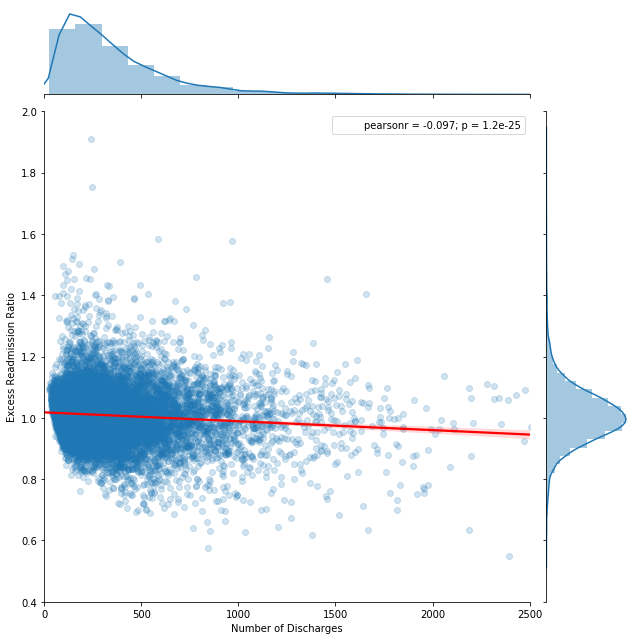

In [136]:
#Draw different charts:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, kind='reg', size=9, 
              xlim=(0,2500), ylim=(0.4,2.0), joint_kws={'line_kws':{'color':'red'}}, scatter_kws={'alpha': 0.2})
plt.show()

/Users/EricBoumel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/EricBoumel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


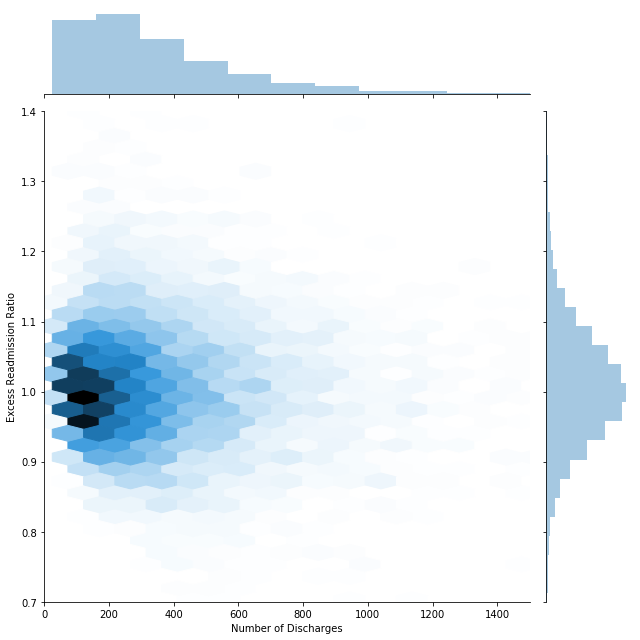

In [138]:
#hexplot
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, stat_func=None,
              kind='hex', size=9, xlim=(0,1500), ylim=(0.7,1.4), joint_kws=dict(gridsize=70))
plt.show()

<b> Conclusion and comments on new diagrams </b>
<br>
<br>
Information in the first chart was not useful since we couldn't see the slope or the inclination of the line. However, in the second chart we can see the trend more clearly.

Also, we can say that small hospitals are having higher readmission ratio.This could mean that people have to come back because small hospitals have less staffs, or not well-trained ones, or even a lack of the necessary medical equipments. 

We concluded earlier that the two populations are separated. In this case, if people don't want to be readmitted, going to big hospitals might be the best option. 

